### Введение

В технологических видах спорта, таких как Formula1 и MotoGP, результаты во многом зависят от уровня болида или мотоцикла, и оценить личный вклада пилота бывает непросто. В основном ориентироваться приходится на стартовые и финишные позиции, а также на телетрансляции (которые обычно акцентируют внимание на лидирующей группе и редко показывают середину или завершающую часть пелотона).

Методика позволяет более детально исследовать и интерпретировать события отдельно взятого гран-при. В качестве источника данных используются итоговые протоколы, публикуемые гоночной дирекцией. Оцениваются времена прохождения круга, смена позиций на каждом круге, действия гонщиков на старте. По результатам пилотам начисляются баллы и формируется итоговый рейтинг. <br>

В качестве примера проанализирован гран-при Катара 2022 года MotoGP, состоявшийся 6.03.2022. <br>

Применение Python и его библиотек (numpy, pandas, seaborn) позволяет сократить время обработки данных примерно с 30-60 минут (при использовании MS Excel) до 5 минут.  <br>

*Примечание.* Для удобства код функций приведён не в порядке их определения, а в конце каждого раздела, в котором они вызывались впервые. <br>

Список используемых таблиц:
- Список гонщиков, принявших участие в гран-при
- Список тех, кто успешно добрался до финиша
- Список сошедших
- Таблица с временем прохождения круга для топ-12 финишировавших
- Таблица скользящих средних для топ-12 финишировавших
- Таблица с позициями гонщиков на каждм круге (формат 1)
- Таблица с позициями гонщиков на каждм круге (формат 2)
- Сводная таблица для топ-12 финишировавших
- Итоговая таблица с баллами для топ-12 финишировавших

### Содержание

1. Описание методики
2. Импорт библиотек
3. Загрузка данных
4. Преобразование и подготовка данных <br>
    4.1. Стартовый порядок <br>
    4.2. Смена позиций по ходу гран-при <br>
    4.3. Порядок на финише <br>
    4.4. Выбывшие пилоты <br>
    4.5. Выигрыш и потери позиций гонщиками по итогам каждого круга <br>
    4.6. Времена прохождения круга <br>
5. Сводная таблица и итоговый рейтинг пилотов <br>
    5.1. Сводная таблица <br>
    5.2. Итоговый рейтинг пилотов <br>
6. Краткое резюме по трём лучшим и трём худшим пилотам гран-при <br>
    6.1. Тройка лучших пилотов из топ-12 финишировавших <br>
    6.2. Тройка худших пилотов из топ-12 финишировавших<br>

### 1. Описание методики

Пилоты оцениваются по трём критериям: 
- Плотность времен прохождения круга;
- Действия на старте;
- Борьба на трассе. <br>

Для пилотов, финишировавших на первых 12 местах, рассчитываются баллы по каждому из трёх критериев. Бóльшее число баллов означает более качественный пилотаж. <br>

**Средняя плотность времени прохождения круга** <br>
Это основной критерий, демонстрирующий качество работы пилота. Чем меньше данный параметр, тем более сбалансированно пилот провёл свою гонку. Рассчитывается как среднее модулей разности между временем текущего круга и скользящим среднем (с окном, равным 2). <br>
Максимальное число баллов - 12. <br>

Пилот, чья плотность времени прохождения круга наименьшая, получает 12 баллов. Соответственно, пилот с наибольшей плотностью получает 1 балл. При равенстве показателей плотности, более высокий балл получает пилот, чья стартовая позиция была хуже. Это объясняется тем, что при старте из глубины пелотона гонщику в среднем приходится сталкиваться с бóльшими числом трудностей - ему в целом сложнее получить перед собой открытую трассу без соперников для более сбалансированной езды. 

В качестве примера рассмотрим покруговку пилота заводской команды Yamaha Франко Морбиделли (см. рисунок ниже). <br>
Точки на графике - это реальное время прохождение отдельно взятого круга, а серая линия - скользящее среднее, которое отражает приближенный к оптимальному гоночный темп. Заметно, что в первой половине гонки у Франко возникли некоторые сложности, не позволяющие ему держать оптимальный темп, - времена варьируются, заметно сильное отклонение от оптимального темпа, плотность невысокая. <br> 
Во второй половине гонки ситуация поменялась кардинально - плотность времён практически образцовая. <br>

Это может быть обусловлено:
- Ошибками пилотирования (которые могут быть вызваны, к примеру, аэродинамическими проблемами при преследовании другого гонщика, неоптимальной температурой шин, психологическим состоянием пилота, который стремится выжать из мотоцикла больше, чем это реально возможно);
- Временем, потраченным на борьбу с другими гонщиками;
- Неспособностью пилота найти ритм, оптимальный для текущего состояния мотоцикла и покрышек. <br>

Заметна явная ошибка на 9 круге. Видно, что предыдущий 8 круг он проехал за 54,8, что в итоге оказалось его лучшим временем за всю гонку. По-видимому, к этому кругу он смог примерно оценить потенциал мотоцикла, попытался ехать быстрее, но перестарался и на следующем 9 круге совершил ошибку. В дальнейшем темп был очень ровный. 

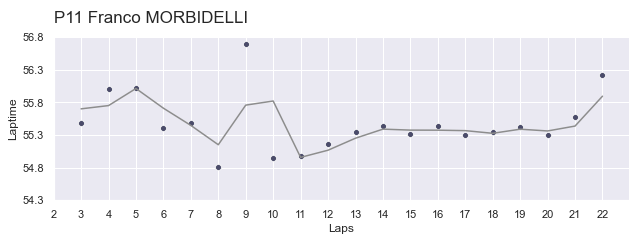

In [2]:
Image("img/morbid.png")

**Действия на старте** <br>
Это число позиций, отыгранных гонщиком на старте и на первом круге. <br>
Максимальное число баллов - 6. <br>

Пилот, отыгравший больше других позиций на старте, получает 6 баллов. Соответственно, тот, кто отыграл меньше всех (или потерял больше всех) позиций, получает 0,5 баллов. При равенстве обгонов более высокий балл получает пилот, стартовавший выше. Это объясняется тем, что при старте из глубины пелотона у гонщиков имеется больше возможностей для улучшения позиции.

**Борьба на трассе** <br>
Это число позиций, отыгранных по ходу гонки, минус число потерянных позиций. При этом из расчёта исключаются позиции, отыгранные за счёт схода впереди идущих пилотов. <br>
Максимальное число баллов - 6. <br>

Пилот, отыгравший больше других позиций по ходу гонки, получает 6 баллов. Соответственно, тот, кто отыграл меньше всех (или потерял больше всех) позиций, получает 0,5 баллов. При равенстве обгонов более высокий балл получает пилот, стартовавший выше. Это объясняется тем, что при старте из глубины пелотона у гонщиков имеется больше возможностей для улучшения позиции.

Для примера обратимся к одной из таблиц, сформированных в ходе проекта. Таблица показывает то, как менялись позиции всех пилотов от круга к кругу. Здесь строка - это номер круга, столбец - номер позиции, а значение в ячейке - номер пилота. <br>
Рассмотрим 6 круг для пилотов Франко Морбиделли (№21) и Алекса Ринца (№42). <br> 

Морбиделли (№21, выделен синим цветом) отыграл 2 позиции по ходу 6 круга, переместившись с 17 на 15 место. Это произошло за счёт схода впереди идущих пилотов под номерами №72 и №43 (выделены красным). Такие улучшения позиции исключаются из расчёта итоговых баллов. <br>

Алекс Ринц (№42, выделен зелёным) также улучшил свою позицию по ходу 6 круга. Сходы пилотов №72 и №43 никак на это не повлияли, так как они ехали позади него, поэтому обгон считается чистым и будет учтён при подсчёте баллов. 

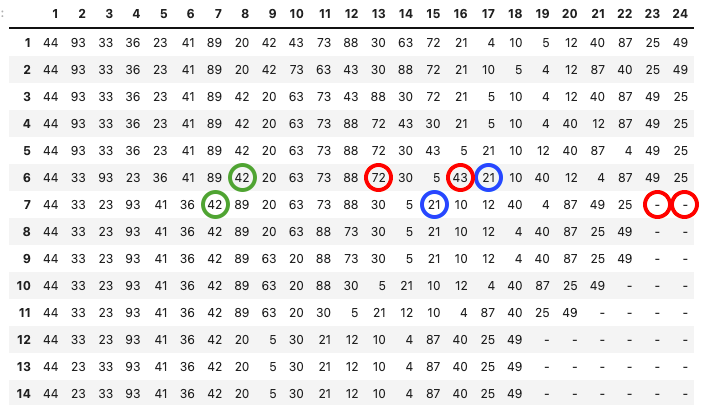

In [3]:
Image("img/pos_change.png")

### 2. Импорт библиотек

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import Image

pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', 500)

palette = ['#4A4E69','#8D8D8D']
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", rc=custom_params)

### 3. Загрузка данных

Этап загрузки данных - единственный, где применяется ручное преобразование. 
<br>
Сырые данные публикуются гоночной дирекцией на официальном сайте в формате .pdf.

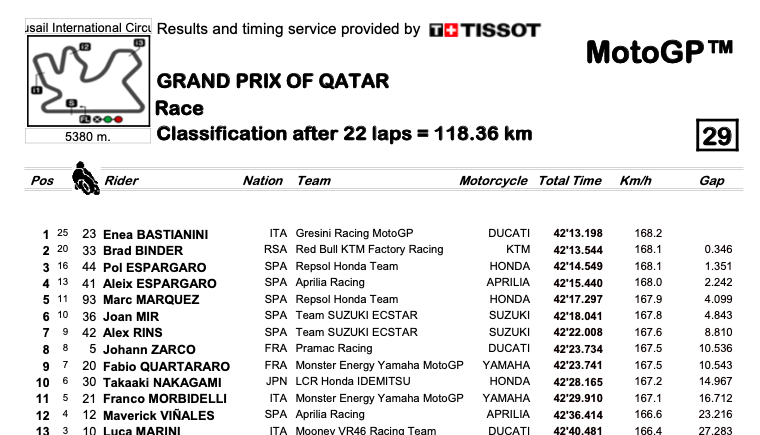

In [6]:
Image("img/protocol.png")

<br>
Конвертеры "pdf-to-excel", в том числе от Adobe, выдают нестабильные результаты -  получаемые файлы .xlsx для разных гран-при могут быть неидентичны или нечитаемы, что делает невозможным применение универсальных алгоритмов для обработки данных. <br>
<br>
Таким образом, необходимые данные копируются из протокола и переносятся в заранее подготовленную форму вручную. <br>
<br>
Пример формата данных в итоговом файле "2022 Data 01 Qatar.xlsx" на рисунке ниже.<br>

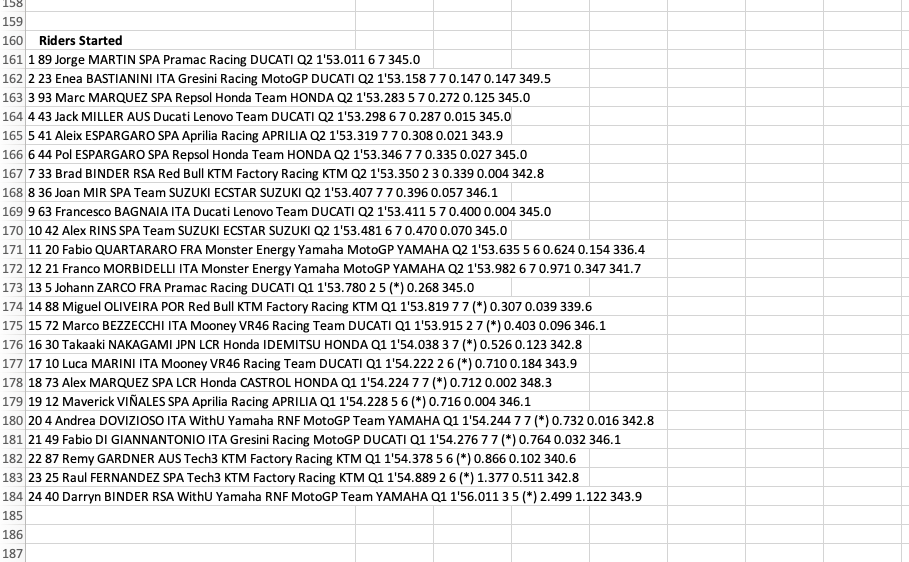

In [7]:
Image("img/xlsx.png")

In [8]:
data = pd.read_excel('2022 Data 01 Qatar.xlsx', header=None)
data = data.fillna('-')

### 4. Преобразование и подготовка данных

#### 4.1. Стартовый порядок

Функция **started** принимает на вход сырые данные и возвращает список стартовавших гонщиков с указанием номера пилота, производителя мотоцикла и стартовой позиции

In [9]:
riders_started = started(data)

In [10]:
riders_started

,num,team,position
Jorge MARTIN,89,DUCATI,1
Enea BASTIANINI,23,DUCATI,2
Marc MARQUEZ,93,HONDA,3
Jack MILLER,43,DUCATI,4
Aleix ESPARGARO,41,APRILIA,5
Pol ESPARGARO,44,HONDA,6
Brad BINDER,33,KTM,7
Joan MIR,36,SUZUKI,8
Francesco BAGNAIA,63,DUCATI,9
Alex RINS,42,SUZUKI,10


Код функции **started**

In [11]:
def started(data):
    
    started_dict = {
        'name': [], 
        'num': [], 
        'team': [], 
        'position': []
    }
    
    for i in data.index[160:200]:
        if data.loc[i,0] == '-':
            pass
        else:
            row = [s for s in data.loc[i,0].split()]
            started_dict['position'].append(row[0])
            started_dict['num'].append(row[1])

            if row[3] == 'DI':
                started_dict['name'].append(row[2]+' '+row[3]+' '+row[4])
            else:
                started_dict['name'].append(row[2]+' '+row[3])
            
            fill_team(row, started_dict)

        started_df =  pd.DataFrame(started_dict, index=[i for i in started_dict['name']]).drop('name', axis=1)
        
        started_df['num'] = started_df['num'].astype(int)
        started_df['position'] = started_df['position'].astype(int)
        
    return started_df

#### 4.2. Смена позиций по ходу гран-при

Функция **positions** принимает на вход сырые данные и список стартовавших гонщикв, а возвращает таблицу, в которой: 
- Столбцы - занимаемая позиция;
- Строки - номер круга;
- Значение в ячейке - номер пилота;
- Знак '-' - пилот сошёл с дистанции.

In [12]:
positions = position(data, riders_started)

In [13]:
positions

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,44,93,33,36,23,41,89,20,42,43,73,88,30,63,72,21,4,10,5,12,40,87,25,49
2,44,93,33,36,23,41,89,20,42,73,63,43,30,88,72,21,10,5,4,12,87,40,25,49
3,44,93,33,36,23,41,89,42,20,63,73,43,88,30,72,21,5,10,4,12,40,87,49,25
4,44,93,33,36,23,41,89,42,20,63,73,88,72,43,30,21,5,10,4,40,12,87,49,25
5,44,93,33,36,23,41,89,42,20,63,73,88,72,30,43,5,21,10,12,40,87,4,49,25
6,44,33,93,23,36,41,89,42,20,63,73,88,72,30,5,43,21,10,40,12,4,87,49,25
7,44,33,23,93,41,36,42,89,20,63,73,88,30,5,21,10,12,40,4,87,49,25,-,-
8,44,33,23,93,41,36,42,89,20,63,88,73,30,5,21,10,12,4,40,87,25,49,-,-
9,44,33,23,93,41,36,42,89,63,20,88,73,30,5,21,10,12,4,40,87,25,49,-,-
10,44,33,23,93,41,36,42,89,63,20,88,30,5,21,10,12,4,40,87,25,49,-,-,-


Код функции **position**

In [14]:
def position(data, riders_started):
    
    l = []
    
    for i in data.index[120:158]:
        if data.loc[i,0] == '-':
            pass
        else:
            row = [int(s) for s in data[0][i].split()][1:]
            l.append(row)
            
    p = pd.DataFrame(l, columns=range(len(riders_started.num)+1)[1:])
    p.index +=1
    p = p.fillna('-')
    
    for i in p.index:
        for j in p.columns:
            if isinstance(p.loc[i,j], float):
                p.loc[i,j] = int(p.loc[i,j])
    
    return p

Функция **pos_by_lap** перереформатирует предыдущую таблицу. Здесь: 
- Столбцы - номер круга;
- Строки - имя пилота;
- Значение в ячейке - текущая позиция;
- Знак '-' - пилот сошёл с дистанции.

In [15]:
positions_by_lap = pos_by_lap(positions, riders_started)

In [16]:
positions_by_lap

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Jorge MARTIN,7,7,7,7,7,7,8,8,8,8,8,-,-,-,-,-,-,-,-,-,-,-
Enea BASTIANINI,5,5,5,5,5,4,3,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1
Marc MARQUEZ,2,2,2,2,2,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5
Jack MILLER,10,12,12,14,15,16,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Aleix ESPARGARO,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4
Pol ESPARGARO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3
Brad BINDER,3,3,3,3,3,2,2,2,2,2,2,2,3,3,3,3,3,3,2,2,2,2
Joan MIR,4,4,4,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Francesco BAGNAIA,14,11,10,10,10,10,10,10,9,9,9,-,-,-,-,-,-,-,-,-,-,-
Alex RINS,9,9,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


Код функции **pos_by_lap**

In [17]:
def pos_by_lap(positions, riders_started):
    
    p = pd.DataFrame(columns=[i for i in positions.index.tolist()], index = [i for i in riders_started.index])

    for i in riders_started.num:
        pos_by_lap = []
        
        for j in positions.index:
            if positions.loc[j][positions.loc[j]==i].size != 0:
                pos_by_lap.append(positions.loc[j][positions.loc[j]==i].index[0])
            else:
                pos_by_lap.append('-')

        p.loc[riders_started[riders_started.num==i].index] = pos_by_lap
    
    return p

#### 4.3. Порядок на финише

Функция **finished** принимает на вход сырые данные и возвращает список финишировавших гонщиков. <br>
- num - номер пилота <br>
- team - производитель мотоцикла <br>
- position - финишная позиция <br>

In [18]:
riders_finished = finished(data)

In [19]:
riders_finished

,num,team,position
Enea BASTIANINI,23,DUCATI,1
Brad BINDER,33,KTM,2
Pol ESPARGARO,44,HONDA,3
Aleix ESPARGARO,41,APRILIA,4
Marc MARQUEZ,93,HONDA,5
Joan MIR,36,SUZUKI,6
Alex RINS,42,SUZUKI,7
Johann ZARCO,5,DUCATI,8
Fabio QUARTARARO,20,YAMAHA,9
Takaaki NAKAGAMI,30,HONDA,10


Код функции **finished**

In [20]:
def finished(data):
    
    finished_dict = {
        'name': [], 
        'num': [], 
        'team': [], 
        'position': []
    }
        
    for i in data.index[40:78]:
        if data.loc[i,0] == '-':
            pass
        else: 
            row = [s for s in data.loc[i,0].split()]
            if 0 < int(row[0]) <= 15: 
                finished_dict['num'].append(row[2])
                if row[3] == 'DI':
                    finished_dict['name'].append(row[2]+' '+row[3]+' '+row[4])
                    finished_dict['position'].append(row[0])
                else:
                    finished_dict['name'].append(row[3]+' '+row[4])
                    finished_dict['position'].append(row[0])
            else:
                finished_dict['num'].append(row[1])
                if row[3] == 'DI':
                    finished_dict['name'].append(row[2]+' '+row[3]+' '+row[4])
                    finished_dict['position'].append(row[0])
                else:
                    finished_dict['name'].append(row[2]+' '+row[3])
                    finished_dict['position'].append(row[0])
                    
            fill_team(row, finished_dict)

    finished_df = pd.DataFrame(finished_dict, index=[i for i in finished_dict['name']]).drop('name', axis=1)

    finished_df['num'] = finished_df['num'].astype(int)
    finished_df['position'] = finished_df['position'].astype(int)

    return finished_df

#### 4.4. Выбывшие пилоты

Функция **out** возвращает список выбывших гонщиков.
- num - номер пилота;
- team - производитель мотоцикла;
- lap - номер круга, на котором пилот выбыл из гонки ;

In [21]:
riders_out = out(data, positions)

In [22]:
riders_out

,num,team,lap
Jorge MARTIN,89,DUCATI,11
Francesco BAGNAIA,63,DUCATI,11
Miguel OLIVEIRA,88,KTM,10
Alex MARQUEZ,73,HONDA,9
Marco BEZZECCHI,72,DUCATI,6
Jack MILLER,43,DUCATI,6


Код функции **out**

In [23]:
def out(data, positions):
    
    out_dict = {
        'name': [], 
        'num': [], 
        'team': [], 
        'lap': []
    }
    
    for i in data.index[80:118]:
        if data.loc[i,0] == '-':
            pass
        else: 
            row = [s for s in data.loc[i,0].split()]
            if row[3] == 'DI':
                out_dict['name'].append(row[1] + ' ' + row[2] + ' ' + row[3])
                out_dict['num'].append(int(row[0]))
                out_dict['lap'].append(len(positions.index) - int(row[-2]))
            else:
                out_dict['name'].append(row[1] + ' ' + row[2])
                out_dict['num'].append(int(row[0]))
                out_dict['lap'].append(len(positions.index) - int(row[-2]))
               
            fill_team(row, out_dict)
                
    out = pd.DataFrame(out_dict, index=out_dict['name']).drop('name', axis=1)
    
    return out 

#### 4.5. Выигрыш и потери позиций гонщиками по итогам каждого круга

Функция **pos_change** рассчитывает количество чисто выигранных и проигранных позиций по итогам каждого круга. <br>
- gain - чисто выигранные позиции по ходу гонки;
- lost - проигранные позиции по ходу гонки;
- change - суммарная смена позиций по ходу гонки.

Под чисто выигранными позициями подразумеваются позиции, отыгранные за счёт действий на трассе, а не за счёт схода впереди идущих пилотов. <br>

In [24]:
position_change = pos_change(positions, riders_finished, riders_out)

In [25]:
position_change

,n,team,gain,lost,change
Enea BASTIANINI,23,DUCATI,4,0,4
Brad BINDER,33,KTM,2,1,3
Pol ESPARGARO,44,HONDA,0,2,2
Aleix ESPARGARO,41,APRILIA,2,0,2
Marc MARQUEZ,93,HONDA,0,3,3
Joan MIR,36,SUZUKI,0,2,2
Alex RINS,42,SUZUKI,2,0,2
Johann ZARCO,5,DUCATI,6,0,6
Fabio QUARTARARO,20,YAMAHA,0,3,3
Takaaki NAKAGAMI,30,HONDA,1,3,4


Код функции **pos_change**

In [26]:
def pos_change(positions, riders_finished, riders_out):
    
    g, l, c = [[] for i in range(3)]
    
    for n in riders_finished.num:
        pos = positions.copy()
        out = riders_out.copy()
        gain = 0
        lost = 0
        change = 0
        coeff = 0
        p = []
        k = 0

        for j in range(2,len(pos.index)+1):
            h1 = 0
            h2 = 0
            
            for o in pos.columns:
                if isinstance(pos.loc[j,o], str):
                    h1 += 1 
                if isinstance(pos.loc[j-1,o], str):
                    h2 += 1
                    
            if h1 == h2:
                if pos.loc[j][pos.loc[j]==n].index[0] == pos.loc[j-1][pos.loc[j-1]==n].index[0]:
                    pass
                if pos.loc[j][pos.loc[j]==n].index[0] > pos.loc[j-1][pos.loc[j-1]==n].index[0]:
                    lost += (pos.loc[j][pos.loc[j]==n].index[0] - pos.loc[j-1][pos.loc[j-1]==n].index[0])
                if pos.loc[j][pos.loc[j]==n].index[0] < pos.loc[j-1][pos.loc[j-1]==n].index[0]:
                    gain += (pos.loc[j-1][pos.loc[j-1]==n].index[0] - pos.loc[j][pos.loc[j]==n].index[0])

            if h1 > h2:
                for m in out.num:
                    if pos.loc[j][pos.loc[j]==m].size == 0:
                        p = pos.loc[j-1].drop(pos.loc[j-1][pos.loc[j-1]==m].index[0]).tolist()
                        p.append('-')
                        pos.loc[j-1] = p
                        out = out[out.num != m]

                if pos.loc[j][pos.loc[j]==n].index[0] == pos.loc[j-1][pos.loc[j-1]==n].index[0]:
                    pass
                if pos.loc[j][pos.loc[j]==n].index[0] > pos.loc[j-1][pos.loc[j-1]==n].index[0]:
                    lost += (pos.loc[j][pos.loc[j]==n].index[0] - pos.loc[j-1][pos.loc[j-1]==n].index[0])
                if pos.loc[j][pos.loc[j]==n].index[0] < pos.loc[j-1][pos.loc[j-1]==n].index[0]:
                    gain += (pos.loc[j-1][pos.loc[j-1]==n].index[0] - pos.loc[j][pos.loc[j]==n].index[0])

        change = gain + lost
        
        g.append(gain)
        l.append(lost)
        c.append(change)

    a = pd.DataFrame({
        'n': riders_finished.num,
        'team': riders_finished.team,
        'gain': g,
        'lost': l,
        'change': c
    }, index=[i for i in riders_finished.index])

    return a

#### 4.6. Времена прохождения круга

Функция **laptime** формирует таблицу с указанием времени прохождения круга для каждого пилота. <br>
- Столбцы - позиция на финише;
- Строки - номер круга.

Времена считаются со второго круга, так как на прохождение первого круга уходит гораздо больше времени за счёт процедуры старта, в итоге время круга выпадает из общей картины и может считаться выбросом.

In [27]:
laptimes = laptime(data, positions)

In [28]:
laptimes

,1,2,3,4,5,6,7,8,9,10,11,12
2,54.953,55.086,55.181,55.237,55.265,55.141,55.487,56.183,55.415,55.975,55.949,56.618
3,54.918,54.846,54.797,54.797,54.875,54.803,54.610,55.509,55.007,55.909,55.530,56.134
4,54.991,55.069,55.076,55.000,55.032,55.073,54.706,55.406,55.171,56.029,56.049,56.044
5,54.956,54.867,54.753,54.944,54.867,55.072,55.013,55.711,55.236,55.380,56.055,56.015
6,54.680,54.716,54.768,54.915,55.141,55.108,54.947,55.358,54.916,55.446,55.444,56.498
7,54.633,54.893,54.938,54.878,54.858,55.032,55.199,55.299,55.216,55.402,55.527,55.448
8,54.940,54.738,54.683,55.086,54.860,55.362,55.401,54.955,55.448,55.208,54.853,55.210
9,54.608,54.484,54.570,54.465,54.716,54.837,55.040,55.033,55.492,55.181,56.741,55.429
10,54.744,54.792,54.726,55.091,54.643,54.889,55.017,55.358,55.523,55.321,54.979,56.058
11,54.549,54.681,54.534,54.530,54.673,54.689,55.084,55.055,55.302,55.080,55.014,55.744


Код функции **laptime**

In [29]:
def laptime(data, positions):
    
    df = data.loc[:38]
    
    for i in df.index:
        if df.loc[i,1] == '-':
            df = df.drop(labels=i, axis=0)
            
    cols1 = [c for c in df.columns if c <= 12]
    lap_times = df[cols1].rename(columns={0: 'laps'})
    lap_times.index = lap_times['laps']
    lap_times = lap_times.drop('laps', axis=1)
    lap_times = lap_times.astype(float).round(3)
    lap_times.index.name = None

    return lap_times

Таблица с подсчитанным значением скользящего среднего времен круга для каждого пилота.

In [30]:
laptimes_mov_avg = moving_average(laptimes)

In [31]:
laptimes_mov_avg

,1,2,3,4,5,6,7,8,9,10,11,12,mov_avg1,mov_avg2,mov_avg3,mov_avg4,mov_avg5,mov_avg6,mov_avg7,mov_avg8,mov_avg9,mov_avg10,mov_avg11,mov_avg12
3,54.918,54.846,54.797,54.797,54.875,54.803,54.610,55.509,55.007,55.909,55.530,56.134,54.936,54.966,54.989,55.017,55.070,54.972,55.049,55.846,55.211,55.942,55.740,56.376
4,54.991,55.069,55.076,55.000,55.032,55.073,54.706,55.406,55.171,56.029,56.049,56.044,54.954,54.957,54.936,54.898,54.954,54.938,54.658,55.457,55.089,55.969,55.790,56.089
5,54.956,54.867,54.753,54.944,54.867,55.072,55.013,55.711,55.236,55.380,56.055,56.015,54.974,54.968,54.915,54.972,54.950,55.073,54.860,55.558,55.204,55.704,56.052,56.030
6,54.680,54.716,54.768,54.915,55.141,55.108,54.947,55.358,54.916,55.446,55.444,56.498,54.818,54.792,54.760,54.930,55.004,55.090,54.980,55.534,55.076,55.413,55.750,56.256
7,54.633,54.893,54.938,54.878,54.858,55.032,55.199,55.299,55.216,55.402,55.527,55.448,54.656,54.805,54.853,54.896,55.000,55.070,55.073,55.328,55.066,55.424,55.486,55.973
8,54.940,54.738,54.683,55.086,54.860,55.362,55.401,54.955,55.448,55.208,54.853,55.210,54.787,54.816,54.811,54.982,54.859,55.197,55.300,55.127,55.332,55.305,55.190,55.329
9,54.608,54.484,54.570,54.465,54.716,54.837,55.040,55.033,55.492,55.181,56.741,55.429,54.774,54.611,54.626,54.776,54.788,55.100,55.220,54.994,55.470,55.194,55.797,55.320
10,54.744,54.792,54.726,55.091,54.643,54.889,55.017,55.358,55.523,55.321,54.979,56.058,54.676,54.638,54.648,54.778,54.680,54.863,55.028,55.195,55.508,55.251,55.860,55.744
11,54.549,54.681,54.534,54.530,54.673,54.689,55.084,55.055,55.302,55.080,55.014,55.744,54.646,54.736,54.630,54.811,54.658,54.789,55.050,55.206,55.412,55.200,54.996,55.901
12,54.720,54.835,54.734,54.552,54.679,54.752,55.148,55.487,55.425,55.770,55.199,55.449,54.634,54.758,54.634,54.541,54.676,54.720,55.116,55.271,55.364,55.425,55.106,55.596


Код функции **moving_average**

In [32]:
def moving_average(laptimes): 
    
    mov_avg = round(laptimes.rolling(window=2).mean(), 3)
    l = []
    
    for i in range(1,13):
        l.append('mov_avg'+str(i))

    mov_avg.columns = l 
    
    laptimes_mov_avg = pd.concat([laptimes,mov_avg], axis=1)
    laptimes_mov_avg = laptimes_mov_avg.drop(2)
    
    return laptimes_mov_avg

### 5. Сводная таблица и итоговый рейтинг пилотов

#### 5.1. Сводная таблица

В сводной таблице собраны данные по каждому гонщику, финишировавшему с 1 по 12 место. <br>
- start_pos - стартовая позиция;
- fin_pos - финишная позиция;
- laptime_avg - среднее время на круге;
- density - плотность времени на круге;
- density_avg - средняя плотность времени на круге для 12 лучших;
- gain - отыграно позиций по итогам гонки;
- gain_avg - среднее число отыгранных позиций для 12 лучших;
- lost - потеряно позиций по итогам гонки;
- lost_avg - среднее число потерянных позиций для 12 лучших;
- gain_total - разница между отыгранными и потерянными позициями;
- change - общее число смены позиций;
- change_avg - среднее число смены позиций для 12 лучших;
- pos_after_first - позиция после первого круга;
- gain_first - отыграно на старте и первом круге.

In [33]:
session = session_table(riders_started, riders_finished, positions, position_change, laptimes)

In [34]:
session

,start_pos,fin_pos,laptime_avg,density,density_avg,gain,gain_avg,lost,lost_avg,gain_total,change,change_avg,pos_after_first,gain_first
Enea BASTIANINI,2,1,54.846,0.096,[0.126],4,1.75,0,1.42,4,4,4.56,5,-3
Brad BINDER,7,2,54.882,0.077,[0.126],2,1.75,1,1.42,1,3,4.56,3,4
Pol ESPARGARO,6,3,54.947,0.163,[0.126],0,1.75,2,1.42,-2,2,4.56,1,5
Aleix ESPARGARO,5,4,54.947,0.157,[0.126],2,1.75,0,1.42,2,2,4.56,6,-1
Marc MARQUEZ,3,5,55.075,0.096,[0.126],0,1.75,3,1.42,-3,3,4.56,2,1
Joan MIR,8,6,55.090,0.102,[0.126],0,1.75,2,1.42,-2,2,4.56,4,4
Alex RINS,10,7,55.221,0.094,[0.126],2,1.75,0,1.42,2,2,4.56,9,1
Johann ZARCO,13,8,55.228,0.134,[0.126],6,1.75,0,1.42,6,6,4.56,19,-6
Fabio QUARTARARO,11,9,55.319,0.072,[0.126],0,1.75,3,1.42,-3,3,4.56,8,3
Takaaki NAKAGAMI,16,10,55.496,0.113,[0.126],1,1.75,3,1.42,-2,4,4.56,13,3


Код функции **session_table**

In [35]:
def session_table(riders_started, riders_finished, positions, position_change, laptimes):
    
    names = riders_finished.index[:12]
    session_dict = {
        'name': riders_finished.index[:12],
        'start_pos': [],
        'fin_pos': riders_finished['position'][:12],
        'laptime_avg': [],
        'density': [],
        'density_avg': [],
        'gain': [],
        'gain_avg': [],
        'lost': [],
        'lost_avg': [],
        'gain_total': [],
        'change': [],
        'change_avg': [],
        'pos_after_first': [],
        'gain_first': [],
    }

    for i in (laptimes.columns):
        session_dict['laptime_avg'].append(round(laptimes.loc[:,i].mean(), 3))
        session_dict['density'].append(round((abs(laptimes[i].rolling(window=2).mean() - laptimes[i])).mean(),3))
    
    for m in session_dict['name']:
        n = int(riders_started[riders_started.index==m].num)

        session_dict['start_pos'].append(riders_started.loc[m]['position'])
        session_dict['change'].append(position_change.loc[m]['change'].astype(int))
        session_dict['pos_after_first'].append(positions.loc[1][positions.loc[1]==n].index[0])

        session_dict['gain'].append(position_change.at[m, 'gain'])
        session_dict['lost'].append(position_change.at[m, 'lost'])
        session_dict['gain_total'].append(position_change.at[m, 'gain'] - position_change.at[m, 'lost'])
        session_dict['gain_first'].append(int(riders_started[riders_started.num==n].position)
                                          - positions.loc[1][positions.loc[1]==n].index[0])

        session_dict['density_avg'].append([round((sum(session_dict['density'])/len(session_dict['density'])), 3)])
        session_dict['change_avg'] = [round(position_change.change.mean(), 2)]
        session_dict['gain_avg'] = [round(sum(session_dict['gain'])/len(session_dict['gain']), 2)]
        session_dict['lost_avg'] = [round(sum(session_dict['lost'])/len(session_dict['lost']), 2)]

    session = pd.DataFrame(session_dict, index = [i for i in session_dict['name']]).drop('name', axis=1)
    
    return session

In [36]:
results = result(session)

In [37]:
results

,overal_place,fin_pos,start_pos,overal_points,density,density_place,density_points,start_place,start_points,gain_place,gain_points
Brad BINDER,1,2,7,20.0,0.077,2,11,2,5.5,6,3.5
Alex RINS,2,7,10,17.5,0.094,3,10,7,3.0,4,4.5
Fabio QUARTARARO,3,9,11,17.0,0.072,1,12,4,4.5,12,0.5
Enea BASTIANINI,4,1,2,15.0,0.096,5,8,10,1.5,2,5.5
Joan MIR,5,6,8,14.0,0.102,6,7,3,5.0,9,2.0
Marc MARQUEZ,6,5,3,13.5,0.096,4,9,6,3.5,11,1.0
Takaaki NAKAGAMI,7,10,16,11.5,0.113,7,6,5,4.0,10,1.5
Johann ZARCO,8,8,13,11.5,0.134,8,5,12,0.5,1,6.0
Pol ESPARGARO,9,3,6,11.5,0.163,10,3,1,6.0,8,2.5
Aleix ESPARGARO,10,4,5,11.5,0.157,9,4,8,2.5,3,5.0


Код функции **results**

In [38]:
def result(session):  
    
    results = pd.DataFrame(index = [i for i in session.index])
    points = list(range(12,0, -1))
    place = list(range(1,13))
    
    results['start_pos'] = session['start_pos']
    results['fin_pos'] = session['fin_pos']
    
    results['density'] = session['density']
    session = session.sort_values(['density', 'start_pos', ], ascending= [True, False])
    session['density_points'] = points
    results['density_points'] = session['density_points']
    session['density_place'] = place
    results['density_place'] = session['density_place']

    session = session.sort_values(['gain_first', 'start_pos', ], ascending= [False, True])
    session['start_points'] = [i*0.5 for i in points]
    results['start_points'] = session['start_points']
    session['start_place'] = place
    results['start_place'] = session['start_place']
    
    session = session.sort_values(['gain_total', 'pos_after_first', ], ascending= [False, True])
    session['gain_points'] = [i*0.5 for i in points]
    results['gain_points'] = session['gain_points']
    session['gain_place'] = place
    results['gain_place'] = session['gain_place']
    
    results['overal_points'] = results['density_points'] + results['start_points'] + results['gain_points']
    results = results.sort_values(['overal_points', 'start_pos', ], ascending= [False, False])
    results['overal_place'] = place
    
    results = results[['overal_place','fin_pos','start_pos','overal_points',
                       'density', 'density_place','density_points',
                       'start_place','start_points',
                       'gain_place','gain_points']]
    
    return results

#### 5.2. Итоговый рейтинг пилотов с суммарными оценками по основным показателям <br>

**dencity_points** <br>
Средняя плотность времени прохождения круга. <br>
Максимум баллов - 12.
<br>
Этот параметр характеризует то, насколько чисто гонщик проехал дистанцию. Низкое значение показателя говорит о том, что гонщик не совершал ошибок и оптимально использовал гоночный пакет (модификация мотоцикла и настройки на гонку).<br>
<br>
**start_points** <br>
Действия пилота на старте (в контексте потери и выигрыша позиций). <br>
Максимум баллов - 6.<br>

**gain_points** <br>
Действия пилота на трассе (в контексте потери и выигрыша позиций). <br>
Максимум баллов - 6.

**overal_points** <br>
Суммарные баллы пилотов, финишировавших на местах с 1 по 12.

In [39]:
results_short = results[['density_points','start_points','gain_points', 'overal_points']]

In [40]:
results_short

,density_points,start_points,gain_points,overal_points
Brad BINDER,11,5.5,3.5,20.0
Alex RINS,10,3.0,4.5,17.5
Fabio QUARTARARO,12,4.5,0.5,17.0
Enea BASTIANINI,8,1.5,5.5,15.0
Joan MIR,7,5.0,2.0,14.0
Marc MARQUEZ,9,3.5,1.0,13.5
Takaaki NAKAGAMI,6,4.0,1.5,11.5
Johann ZARCO,5,0.5,6.0,11.5
Pol ESPARGARO,3,6.0,2.5,11.5
Aleix ESPARGARO,4,2.5,5.0,11.5


### 6. Краткое резюме по трём лучшим и трём худшим пилотам гран-при

#### 6.1. Тройка лучших пилотов из топ-12 финишировавших

##### **1. Brad BINDER (20 баллов)**

Старт: 7. Финиш: 2. <br>

Ключевые показатели:
- Плотность (0.077) - 2 место из 12; 
- Действия на старте - 2 место из 12;
- Борьба на трассе - 6 место из 12.

Хорошая плотность времен, отсутствуют явные ошибки. Отличный старт - отыграно 4 позиции. Средний показатель борьбы на трассе (6 место из 12), так как всю гонку ехал в лидирующей группе. <br>

Ехал в своём темпе с самого начала дистанции, избегая лишней борьбы, всего лишь три раза за гонку сменив позицию. <br>
Отличительной особенностью является то, что времена прохождения последних кругов практически идентичны временам на первых кругах. Обычно во второй половине гонки пилоты едут медленнее из-за износа шин. Здесь же этого не наблюдается.

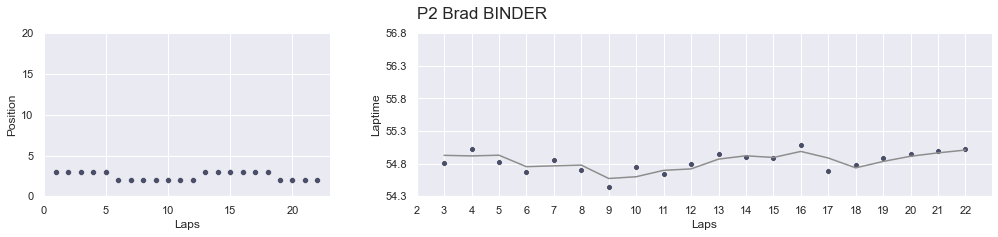

In [41]:
graphics(laptimes_mov_avg, riders_finished, 2)

##### **2. Alex RINS (17.5 баллов)**

Старт: 10. Финиш: 7. <br>

Ключевые показатели:
- Плотность (0.094) - 3 место из 12; 
- Действия на старте - 7 место из 12;
- Борьба на трассе - 4 место из 12.

Хорошая плотность времён, безошибочный пилотаж. Заметно плавное снижение темпа, начиная с 13 круга. На старте отыграл всего одну позицию, что является средним показателем (7 место из 12). По ходу гонки позиций не уступал. <br>

Высокое значение плотность и отсутствие явных провалов по остальным показателям обеспечили второе место в итоговом рейтинге. 

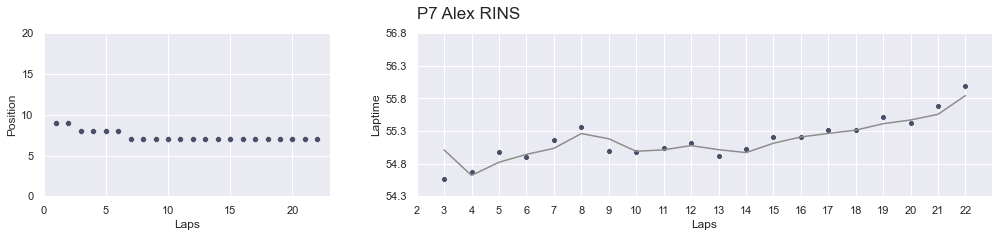

In [42]:
graphics(laptimes_mov_avg, riders_finished, 7)

##### **3. Fabio QUARTARARO (17.0 баллов)**

Старт: 11. Финиш: 9. <br>

Ключевые показатели:
- Плотность (0.072) - 1 место из 12; 
- Действия на старте - 4 место из 12;
- Борьба на трассе - 12 место из 12.

Лучшие показатели плотности и в целом очень сильная гонка. На общую оценку сильно повлиял худший результат для борьбы на трассе. <br>

Мотоциклы Yamaha хорошо управляются, но на них очень сложно обгонять соперников. На данном гран-при это проявилось в полной мере. Управляемость обеспечила стабильный темп, но по ходу гонки не было совершено ни одного чистого опережения. <br>

На 6 круге было поставлено лучшее время, заметна попытка поехать быстрее, но в итоге времена распределились вокруг 55.3, и этого было недостаточно для борьбы за топ-позиции.

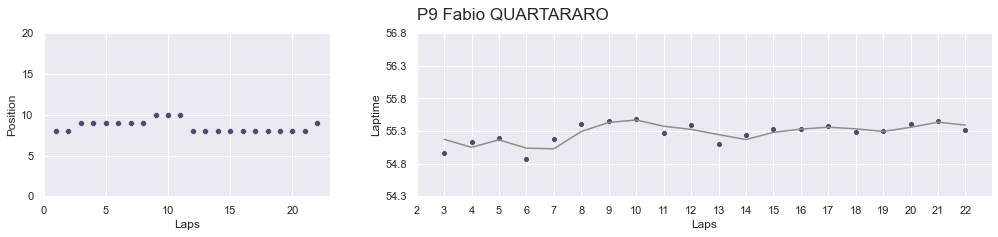

In [43]:
graphics(laptimes_mov_avg, riders_finished, 9)

#### 6.2. Тройка худших пилотов из топ-12 финишировавших

##### **10. Aleix ESPARGARO (11.5 баллов)**

Старт: 5. Финиш: 4. <br>

Ключевые показатели:
- Плотность (0.157) - 9 место из 12;
- Действия на старте - 8 место из 12;
- Борьба на трассе - 3 место из 12.

Очень рваный темп в середине гонки, плохой старт, две чисто отыгранные позиции по ходу гонки. <br>

Несмотря на финиш всего в одном месте от топ-3, выступление получилось довольно смазанным из-за большого числа ошибок пилотирования. Непонятно, удалось ли гонщику полностью раскрыть потенциал мотоцикла. Судя по неплохому темпу в целом (примерно 54.8), имелись реальные шансы побороться за 2-3 место.  

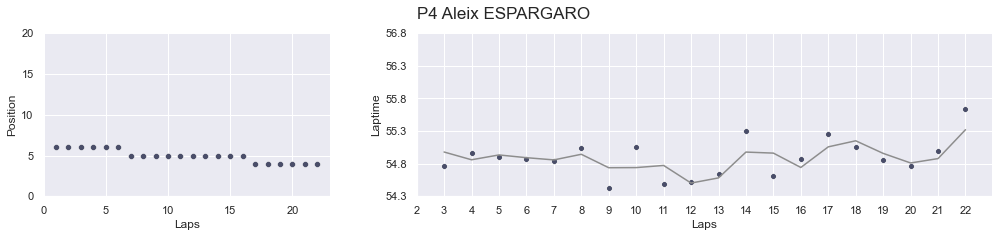

In [44]:
graphics(laptimes_mov_avg, riders_finished, 4)

##### **11. Maverick VIÑALES (7.0 баллов)**

Старт: 19. Финиш: 12. <br>

Ключевые показатели:
- Плотность (0.213) - 12 место из 12; 
- Действия на старте - 9 место из 12;
- Борьба на трассе - 5 место из 12.

Худшая плотность среди всех пилотов топ-12 и довольно плохой старт. <br>

В целом положительная оценка за борьбу на трассе не меняет общей картины. Две явные ошибки в первой половине гонки (на 6 и 10 круге), одна из которых стоила позиции. Две ещё бóльшие ошибки под конец гонки. 

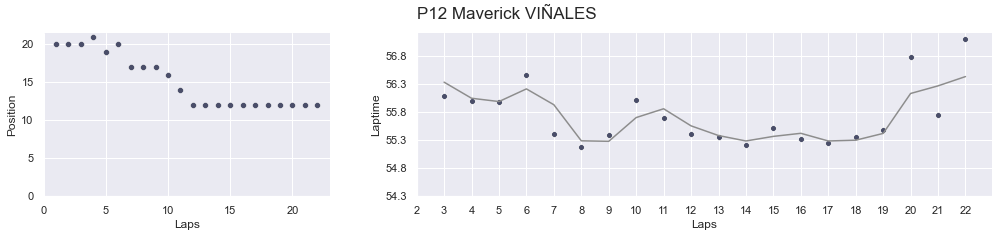

In [45]:
graphics(laptimes_mov_avg, riders_finished, 12)

In [46]:
results_short

,density_points,start_points,gain_points,overal_points
Brad BINDER,11,5.5,3.5,20.0
Alex RINS,10,3.0,4.5,17.5
Fabio QUARTARARO,12,4.5,0.5,17.0
Enea BASTIANINI,8,1.5,5.5,15.0
Joan MIR,7,5.0,2.0,14.0
Marc MARQUEZ,9,3.5,1.0,13.5
Takaaki NAKAGAMI,6,4.0,1.5,11.5
Johann ZARCO,5,0.5,6.0,11.5
Pol ESPARGARO,3,6.0,2.5,11.5
Aleix ESPARGARO,4,2.5,5.0,11.5


##### **12. Franco MORBIDELLI (6.0 баллов)**

Старт: 12. Финиш: 11. <br>

Ключевые показатели:
- Плотность (0.200) - 11 место из 12; 
- Действия на старте - 11 место из 12;
- Борьба на трассе - 7 место из 12.

Низкая плотность, плохой старт, ни одного чистого опережения соперника. <br>

Очень невыразительная езда в первой половине гонки. Явная ошибка на 9 круге. При этом после 11 круга времена стабилизировались в районе 55.4 и плотность очень хорошая, однако темп на полсекунды медленнее, чем у лидеров. 

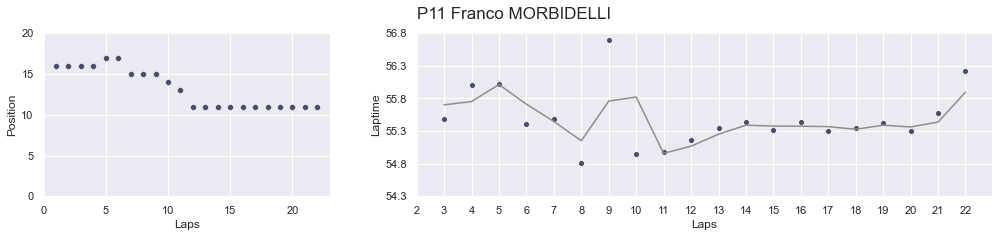

In [47]:
graphics(laptimes_mov_avg, riders_finished, 11)

Код функции **graphics**

In [48]:
def graphics(laptimes_mov_avg, riders_finished, c=(1,12)):
    
    a = list(laptimes_mov_avg.columns[:12])
    b = list(laptimes_mov_avg.columns[12:])

    if type(c) is tuple:
        
        j = range(c[0]-1,c[1])
        
        for i in j:

            f, ax = plt.subplots(1,2, figsize=(17,3), gridspec_kw={'width_ratios': [1, 2]})

            sns.scatterplot(x=positions_by_lap.columns.tolist(), 
                            y=positions_by_lap.loc[riders_finished[riders_finished.position==i+1].index].values.flatten().tolist(),
                            marker='o', ax=ax[0], color=palette[0])

            ax[0].set_xticks(np.arange(0 , laptimes_mov_avg.index[-1]+1, 5))
            ax[0].set_yticks(np.arange(0 , len(riders_started.position)+1, 5))
            ax[0].set_xlabel('Laps')
            ax[0].set_ylabel('Position')

            sns.lineplot(x=laptimes_mov_avg.index, 
                         y=a[i], 
                         marker='o',linestyle='', data=laptimes_mov_avg, ax=ax[1], color=palette[1])
            sns.lineplot(x=laptimes_mov_avg.index, 
                         y=b[i], data=laptimes_mov_avg, ax=ax[1], color=palette[2])

            ax[1].set_title('P'+str(i+1)+' '+riders_finished.index[i], fontsize=17, loc='left', y=1.05)
            ax[1].set_xticks(np.arange(2, laptimes_mov_avg.index[-1]+1))
            ax[1].set_yticks(np.arange(round(laptimes_mov_avg.min().min(), 3), laptimes.mean().mean()+2, 0.5))
            ax[1].set_xlabel('Laps', fontsize=12)
            ax[1].set_ylabel('Laptime')
            ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        
    if type(c) is list:
        
        j = [i-1 for i in c]
        
        for i in j:

            f, ax = plt.subplots(1,2, figsize=(17,3), gridspec_kw={'width_ratios': [1, 2]})

            sns.scatterplot(x=positions_by_lap.columns.tolist(), 
                            y=positions_by_lap.loc[riders_finished[riders_finished.position==i+1].index].values.flatten().tolist(),
                            marker='o', ax=ax[0], color=palette[0])

            ax[0].set_xticks(np.arange(0, laptimes_mov_avg.index[-1]+1, 5))
            ax[0].set_yticks(np.arange(0, len(riders_started.position)+1, 5))
            ax[0].set_xlabel('Laps')
            ax[0].set_ylabel('Position')

            sns.lineplot(x=laptimes_mov_avg.index, 
                         y=a[i], 
                         marker='o',linestyle='', data=laptimes_mov_avg, ax=ax[1], color=palette[1])
            sns.lineplot(x=laptimes_mov_avg.index, 
                         y=b[i], data=laptimes_mov_avg, ax=ax[1], color=palette[2])

            ax[1].set_title('P'+str(i+1)+' '+riders_finished.index[i], fontsize=17, loc='left', y=1.05)
            ax[1].set_xticks(np.arange(2, laptimes_mov_avg.index[-1]+1))
            ax[1].set_yticks(np.arange(round(laptimes_mov_avg.min().min(), 3), laptimes.mean().mean()+2, 0.5))
            ax[1].set_xlabel('Laps', fontsize=12)
            ax[1].set_ylabel('Laptime')
            ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

    if type(c) is int:
    
        f, ax = plt.subplots(1,2, figsize=(17,3), gridspec_kw={'width_ratios': [1, 2]})
    
        sns.scatterplot(x=positions_by_lap.columns.tolist(), 
                        y=positions_by_lap.loc[riders_finished[riders_finished.position==c].index].values.flatten().tolist(),
                        marker='o', ax=ax[0], color=palette[0])

        ax[0].set_xticks(np.arange(0 , laptimes_mov_avg.index[-1]+1, 5))
        ax[0].set_yticks(np.arange(0 , len(riders_started.position)+1, 5))
        ax[0].set_xlabel('Laps')
        ax[0].set_ylabel('Position')

        sns.lineplot(x=laptimes_mov_avg.index, 
                     y=a[c-1], 
                     marker='o',linestyle='', data=laptimes_mov_avg, ax=ax[1], color=palette[1])
        sns.lineplot(x=laptimes_mov_avg.index, 
                     y=b[c-1], data=laptimes_mov_avg, ax=ax[1], color=palette[2])

        ax[1].set_title('P'+str(c)+' '+riders_finished.index[c-1], fontsize=17, loc='left', y=1.05)
        ax[1].set_xticks(np.arange(2, laptimes_mov_avg.index[-1]+1))
        ax[1].set_yticks(np.arange(round(laptimes_mov_avg.min().min(), 3), laptimes.mean().mean()+2, 0.5))
        ax[1].set_xlabel('Laps', fontsize=12)
        ax[1].set_ylabel('Laptime')
        ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    
    plt.show()